# MLOps introduction using ZenML, MLflow

---

Sources :

- [freeCodeCamp Course](https://www.youtube.com/watch?v=-dJPoLm_gtE)
- [Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv)
- [ZenML Fundamentals](https://www.youtube.com/watch?v=iCB4KNjl5vs&t=159s)

---

## Introduction to MLOps

### MLOps presentation

**MLOps Pipeline in 4 steps :**

- **Data Engineering Pipeline**
  - "Data Ingestion" : Collection of data from different sources
  - "Exploration and Validation" : Understanding data content and structure
  - "Data Wrangling" : Formatting and cleaning the data
  - "Data Labeling" : Assigning categories to data points
  - "Data Splitting" : Division of data into training, validation and test datasets

- **Model Engineering Introduction**
  - Core of the ML workflow : writing and executing ML algorithms
  - Obtaining the ML model

- **Model Engineering Pipieline**
  - "Model Training" : Applying ML algorithms on training data
  - "Model Evaluation" : Validating the model pre-deployment
  - "Model Testing" : Final acceptance test using test dataset
  - "Model Packaging" : Exporting model into a consumable format for business application

- **Model Deployment Introduction**
  - "Model Serving" : Addressing the ML model in a production environment
  - "Model Performance Monitoring" : Observing performance on live, unseen data
  - "Model Performance Logging" : Recording every inference request

### ZenML MLOps Framework presentation

**ZenML: What is it used for?**

ZenML is an open-source MLOps framework designed to help data scientists and ML engineers build production-ready machine learning pipelines. It simplifies the transition from research (experiments, notebooks) to deployment (scalable, automated workflows).

**Key Features of ZenML**

- ✅ Pipeline Orchestration – Automates ML workflows, making them modular and reproducible.
- ✅ Experiment Tracking – Integrates with tools like MLflow to track runs, metrics, and parameters.
- ✅ Data & Model Versioning – Ensures datasets and models are properly versioned for reproducibility.
- ✅ MLOps Integration – Connects with popular tools (Kubeflow, Airflow, Weights & Biases, etc.).
- ✅ Cloud & On-Prem Support – Works with AWS, GCP, Azure, or local infrastructure.

**Use Cases**
- 🔹 Automated ML Pipelines – Standardizing workflows from data ingestion to model training.
- 🔹 Reproducible Experiments – Ensuring results can be replicated across environments.
- 🔹 Continuous Training (CT) – Automating model retraining with fresh data.
- 🔹 CI/CD for ML – Enabling automated testing and deployment of ML models.

### NGROK presentation

**Ngrok: What is it used for ?**

Ngrok is a secure tunneling service that allows you to expose local servers to the public internet. It creates a temporary, publicly accessible URL for a local web service, making it easy to test and share projects without deploying them.

**Key Features of Ngrok**
- ✅ Exposes Localhost to the Internet – Share a local web service using a public URL.
- ✅ Secure Tunnels – Encrypted connections to protect data.
- ✅ Custom Subdomains – Use personalized URLs instead of random ones.
- ✅ Webhook Testing – Easily test webhooks from services like Stripe, GitHub, and Twilio.
- ✅ Access Control & Authentication – Restrict access with passwords and tokens.
- ✅ Traffic Inspection – View real-time requests and responses via a web dashboard.

**Use Cases**
- 🔹 Local Development Sharing – Show your web app to others without deployment.
- 🔹 Webhook Testing – Simulate real-world webhook interactions.
- 🔹 Remote Access – Access services running on private networks.
- 🔹 IoT & Embedded Systems – Expose local devices like Raspberry Pi to the internet.

### Install libraries

In [ ]:
%pip install "zenml[server]"
!zenml integration install sklearn -y
%pip install pyparsing==2.4.2

import IPython

# Automatically restart kernel
# IPython.Application.instance().kernel.do_shutdown(restart=True)

⠹ Installing integrations...


In [ ]:
NGROK_TOKEN = "2ttHmTDiKf9y4DzeP9rUlxgKAtw_3H3e5Gr7HECJqbhzJ5p5Y"

In [ ]:
from zenml.environment import Environment

if Environment.in_google_colab():

  # install and authenticate ngrok
  !pip install pyngrok
  !ngrok authtoken {NGROK_TOKEN}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


### ZenML Setup

In [ ]:
!rm -rf .zen
!zenml init

Initializing the ZenML global configuration version to 0.75.0
Creating database tables
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠇ Initializing ZenML repository at /content.
⠏ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠇ Initializing ZenML repository at /content.
⠏ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializin

### First example of ML Code (classify handwritten digits using SVC)

We train a SVC to classify images of handwritten digits. We load the data, train a model on the training set and test it on the test set.

In [ ]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
def train_test() -> None:     ## "-> None" tells other developers and other functions that this function is \
                              ##  only meant for side effects (e.g., training a model, logging, saving files)
                              ##  and won't return anything
  """Simple Train and test of a sklearn SVC on the digits dataset for the example"""
  digits = load_digits()
  data = digits.images.reshape((len(digits.images), -1))
  X_train, X_test, y_train, y_test = train_test_split(
      digits.data, digits.target, test_size=0.2, random_state=42
  )
  model = SVC(gamma=0.001)
  model.fit(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  print(f"Test accuracy: {test_acc}")

In [ ]:
train_test()

Test accuracy: 0.9888888888888889


---

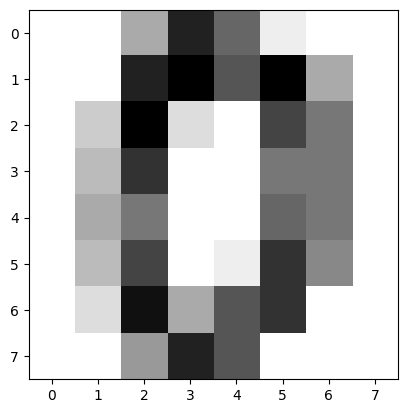

In [ ]:
import matplotlib.pyplot as plt
digits = load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

---

### Same example using ZenML

We redo the same example but using ZenML.

ZenML allows us to define each steps (data loading, model training and model evaluation) as a ZenML Pipeline Step. It is done by simply moving each step to its own function and decorating them with ZenML's `@step` [python decorator](https://stackoverflow.com/questions/739654/how-do-i-make-function-decorators-and-chain-them-together/1594484#1594484).

In [ ]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
from typing import Tuple

In [ ]:
digits = load_digits()
data = digits.images.reshape((len(digits.images), -1))
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, test_size=0.2, random_state=42
)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
@step
def importer() -> Tuple[
    Annotated[np.ndarray, "X_train"],
    Annotated[np.ndarray, "X_test"],
    Annotated[np.ndarray, "y_train"],
    Annotated[np.ndarray, "y_test"],
]:
    """Load the digits dataset as numpy arrays"""
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))  # Reshaped correctly
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, random_state=42
    )

    print(f"Shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Shapes -> X_test: {X_test.shape}, y_test: {y_test.shape}")

    return X_train, X_test, y_train, y_test


@step
def svc_trainer(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:      ## https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html
    """Train a sklearn SVC classifier"""
    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)
    return model


@step
def evaluator(
    X_test: np.ndarray,
    y_test: np.ndarray,
    model: ClassifierMixin,
) -> float:
    """Evaluate the sklearn SVC model"""
    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc}")
    return test_acc

Then you have to use the `@pipeline` decorator from ZenML to connect all the steps.

In [ ]:
from zenml import pipeline

In [ ]:
@pipeline
def digits_pipeline():
  """Links all the steps together in a pipeline"""
  X_train, X_test, y_train, y_test = importer()
  model = svc_trainer(X_train = X_train, y_train = y_train)
  evaluator(X_test = X_test, y_test = y_test, model = model)

### Run ZenML Pipeline

In [ ]:
digits_svc_pipeline = digits_pipeline()

Initiating a new run for the pipeline: digits_pipeline.
Registered new pipeline: digits_pipeline.
Using user: default
Using stack: default
  artifact_store: default
  orchestrator: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Step importer has started.
Shapes -> X_train: (1437, 64), y_train: (1437,)
Shapes -> X_test: (360, 64), y_test: (360,)
Step importer has finished in 4.875s.
Step svc_trainer has started.
Step svc_trainer has finished in 2.065s.
Step evaluator has started.
Test accuracy: 0.9888888888888889
Step evaluator has finished in 0.287s.
Pipeline run has finished in 7.474s.


---

### Old version of ZenML code for debugging and quick iterations

In [ ]:
digits_svc_pipeline.run(unlisted=True)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.11/dist-packages/pydantic/main.py:828 in __getattr__                      │
│                                                                                                  │
│    825 │   │   │   │   │   │   return super().__getattribute__(item)  # Raises AttributeError i  │
│    826 │   │   │   │   │   else:                                                                 │
│    827 │   │   │   │   │   │   # this is the current error                                       │
│ ❱  828 │   │   │   │   │   │   raise AttributeError(f'{type(self).__name__!r} object has no att  │
│    829 │   │                                                                                     │
│    830 │   │   def __setattr__(self, name: str, value: Any) -> None:                             │
│    831 │   │   │   if name in self.__class_vars__:                                               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'PipelineRunResponse' object has no attribute 'run'

**What does `run(unlisted=True)` do?**

- `run()` executes the pipeline.

- `unlisted=True` ensures that the pipeline run is **not recorded in ZenML’s metadata store**.
  - This is useful for **debugging** or quick tests without logging unnecessary runs.
  - When `unlisted=True`, the run won't appear in the **ZenML dashboard** or be tracked in its backend.


**Without `unlisted=True`**

If you just use `digits_svc_pipeline.run()`, ZenML will:
- Log metadata about the run.
- Save artifacts (like trained models, datasets, etc.).
- Track pipeline versions.


**When to use `unlisted=True`?**

- **Debugging**: Run a pipeline without cluttering the ZenML tracking system.

- **Quick iterations**: If you're tweaking code and don't need to track every attempt.

---

### Newer versions of ZenML for debugging and quick iterations

In [ ]:
import zenml
zenml.__version__

'0.75.0'

**For newer versions of ZenML :**

- ✅ Use `pipeline_run = digits_svc_pipeline()` for **quick iterations**.
- ✅ Use `digits_svc_pipeline.configure(enable_cache=False)()` for **forcing a full re-run**.
- ❌ `.run(unlisted=True)` **is not needed in ZenML 0.75.0**.

### ZenML Dashboard

In [ ]:
from zenml.environment import Environment

def start_zenml_dashboard(port=8237):
  if Environment.in_google_colab():
    from pyngrok import ngrok

    public_url = ngrok.connect(port)
    print(f"Dashboard running at {public_url}")
    !zenml up --blocking --port {port}

  else:
    !zenml up --port {port}

start_zenml_dashboard()

INFO:pyngrok.ngrok:Opening tunnel named: http-8237-de488522-f7ff-4154-9265-ee95715d0374


Opening tunnel named: http-8237-de488522-f7ff-4154-9265-ee95715d0374


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="no configuration paths supplied"


t=2025-03-05T13:58:39+0000 lvl=info msg="no configuration paths supplied"


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


t=2025-03-05T13:58:39+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


t=2025-03-05T13:58:39+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


t=2025-03-05T13:58:39+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="client session established" obj=tunnels.session


t=2025-03-05T13:58:39+0000 lvl=info msg="client session established" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="tunnel session started" obj=tunnels.session


t=2025-03-05T13:58:39+0000 lvl=info msg="tunnel session started" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg=start pg=/api/tunnels id=bdc77725d5c9cf33


t=2025-03-05T13:58:39+0000 lvl=info msg=start pg=/api/tunnels id=bdc77725d5c9cf33


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg=end pg=/api/tunnels id=bdc77725d5c9cf33 status=200 dur=699.813µs


t=2025-03-05T13:58:39+0000 lvl=info msg=end pg=/api/tunnels id=bdc77725d5c9cf33 status=200 dur=699.813µs


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg=start pg=/api/tunnels id=e074c162beacaf86


t=2025-03-05T13:58:39+0000 lvl=info msg=start pg=/api/tunnels id=e074c162beacaf86


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg=end pg=/api/tunnels id=e074c162beacaf86 status=200 dur=158.53µs


t=2025-03-05T13:58:39+0000 lvl=info msg=end pg=/api/tunnels id=e074c162beacaf86 status=200 dur=158.53µs


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg=start pg=/api/tunnels id=0a49d0dddf275a23


t=2025-03-05T13:58:39+0000 lvl=info msg=start pg=/api/tunnels id=0a49d0dddf275a23


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-de488522-f7ff-4154-9265-ee95715d0374 addr=http://localhost:8237 url=https://6852-34-74-20-15.ngrok-free.app


Dashboard running at NgrokTunnel: "https://6852-34-74-20-15.ngrok-free.app" -> "http://localhost:8237"
t=2025-03-05T13:58:39+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-de488522-f7ff-4154-9265-ee95715d0374 addr=http://localhost:8237 url=https://6852-34-74-20-15.ngrok-free.app


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:39+0000 lvl=info msg=end pg=/api/tunnels id=0a49d0dddf275a23 status=201 dur=67.967569ms


t=2025-03-05T13:58:39+0000 lvl=info msg=end pg=/api/tunnels id=0a49d0dddf275a23 status=201 dur=67.967569ms
The `zenml up` command is deprecated and will be removed in a future release. Please use the `zenml 
login --local` command instead.
Calling `zenml login --local`...
The local ZenML dashboard is about to deploy in a blocking process.
Deploying a local daemon ZenML server.
Not writing the global configuration to disk in a ZenML server environment.
Initializing the ZenML global configuration version to 0.75.0
Not writing the global configuration to disk in a ZenML server environment.
Starting ZenML Server as blocking process... press CTRL+C once to stop it.
INFO:     Started server process [75874]
INFO:     Waiting for application startup.
Not writing the global configuration to disk in a ZenML server environment.
Not writing the global configuration to disk in a ZenML server environment.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8237 (Pre

INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d92736c5a6a4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d92736c5a6a4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET / HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=c07bc528a040 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/index-DWoLoYDY.js HTTP/1.1" 200 OK
t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=c07bc528a040 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=99cbcb709ee5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=99cbcb709ee5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7fb665f30133 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7fb665f30133 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7cb2073325ea l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7cb2073325ea l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3f135fa4a284 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3f135fa4a284 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=26f046b1568b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=26f046b1568b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5f4d06727697 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5f4d06727697 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=475f14649db8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=475f14649db8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/%40radix-AvWw-1nd.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=1d6db9b8bafe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=1d6db9b8bafe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=89ed03bd2f98 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=89ed03bd2f98 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4a0ffffec7be l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4a0ffffec7be l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5319a7b26c13 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5319a7b26c13 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=2dde10c1188b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=2dde10c1188b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=981918161cae l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=981918161cae l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d5207a637136 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d5207a637136 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e3965d5f3ad0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e3965d5f3ad0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5df467b118bd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5df467b118bd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=9b79139ddda0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=9b79139ddda0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=9106a40b8d48 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=9106a40b8d48 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6247a9c76675 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6247a9c76675 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=2e756242e38c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=2e756242e38c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=cd0e107563f9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=cd0e107563f9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6e76e502398c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6e76e502398c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=89a86933b17f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=89a86933b17f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=96774be5cddb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=96774be5cddb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=948c8ddad326 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=948c8ddad326 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d37e58c859ae l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d37e58c859ae l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=f97cd76bfbe4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=f97cd76bfbe4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-ext-400-normal-Dc4VJyIJ.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/%40reactflow-Fd0xVSp_.css HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/%40tanstack-CcI3lvwB.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=cd7c5b136f37 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=cd7c5b136f37 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4be407599c68 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4be407599c68 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6cd380e48462 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6cd380e48462 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=49f279b582e6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=49f279b582e6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=f6d2e70446c0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=f6d2e70446c0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7350da302dfd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7350da302dfd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=59819f1e364b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=59819f1e364b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5d4975d3e0cc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5d4975d3e0cc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7728b2a391f6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7728b2a391f6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=95770cdbe316 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=95770cdbe316 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6b4d1750d6ca l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6b4d1750d6ca l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=789d2d575a3d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=789d2d575a3d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=dd215ed00c63 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=dd215ed00c63 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5330d04b6047 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5330d04b6047 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7eab0c98d2c6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=7eab0c98d2c6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=fc926912ff9a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=fc926912ff9a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3de848b6651e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3de848b6651e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=37350789ad74 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=37350789ad74 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e3f52787b459 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/%40reactflow-DMaYqp8l.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-ext-400-normal-Bput3-QP.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/index-BCKg1Y5r.css HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/%40react-router-BUo5vhN4.js HTTP/1.1" 200 OK
t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e3f52787b459 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e9fea771ec79 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e9fea771ec79 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=36cb5a999ba4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=36cb5a999ba4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3c922d8847b6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3c922d8847b6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=29310fbe7eb4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=29310fbe7eb4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d5c62a5b4221 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d5c62a5b4221 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=a294a57647f4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=a294a57647f4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=265aeb55ff2f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=265aeb55ff2f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5d8723cb02a5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=5d8723cb02a5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=2cd8810267b7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=2cd8810267b7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=9245379a54b0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=9245379a54b0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ff42abe6eea0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ff42abe6eea0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e01b65095b18 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e01b65095b18 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=b874dd9af252 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=b874dd9af252 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4ee789fd111b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4ee789fd111b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=bb710890761a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=bb710890761a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=45b1d888be31 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=45b1d888be31 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6a3df706d725 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6a3df706d725 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=001c4c8f1b00 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=001c4c8f1b00 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=14829cc0cff4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=14829cc0cff4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=0918056a18a6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=0918056a18a6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3a8259bc9fbc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3a8259bc9fbc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e5383dab9526 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e5383dab9526 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d0086cd0f25c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d0086cd0f25c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3a52a0891c0b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=3a52a0891c0b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6c0d168f576c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6c0d168f576c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ea7d9adebf48 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ea7d9adebf48 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=8aa4efc8e035 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=8aa4efc8e035 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=0ea2a967e330 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=0ea2a967e330 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4655f4f6c75e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4655f4f6c75e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=275ad9df6710 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=275ad9df6710 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4ed26cac0bcd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=4ed26cac0bcd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ac3dc4a69889 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ac3dc4a69889 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ca6a7dada02d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ca6a7dada02d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=32314f322edb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=32314f322edb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=53baca58e55b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=53baca58e55b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6eb2e7d9750e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6eb2e7d9750e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=46a1c144ed9b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=46a1c144ed9b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6bbd0638a389 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=6bbd0638a389 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d2788d601f36 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-500-normal-D2bGa7uu.woff2 HTTP/1.1" 200 OK
t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=d2788d601f36 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ed518db0ba95 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=ed518db0ba95 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e9f0ca2e0e31 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=e9f0ca2e0e31 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=21b63f934bbf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=21b63f934bbf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=066ed1bc2470 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:58:59+0000 lvl=info msg="join connections" obj=join id=066ed1bc2470 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=71308e480fb7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=71308e480fb7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d50ea989b18a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d50ea989b18a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=11b0a78c08ff l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=11b0a78c08ff l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=40fe5ef86f14 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=40fe5ef86f14 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=be88c2fcbcef l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=be88c2fcbcef l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=64ac7d9f7aea l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=64ac7d9f7aea l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=b8d7387947b9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=b8d7387947b9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=9b31557e65d8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=9b31557e65d8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=0d1401e8a193 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=0d1401e8a193 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8df711cdd0e3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8df711cdd0e3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=83a8e36905cf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=83a8e36905cf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e7c0cb191bd3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e7c0cb191bd3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=720ee8fdce8a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=720ee8fdce8a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=691c63f5e690 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=691c63f5e690 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=1ddcd6b579d6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=1ddcd6b579d6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f2cab401bf2f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f2cab401bf2f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=de20a30f6283 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=de20a30f6283 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=48ac7681ecd4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=48ac7681ecd4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=77ecddb5f695 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=77ecddb5f695 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=5acc80a67760 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=5acc80a67760 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=bf4e0ab73e18 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=bf4e0ab73e18 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=48d4467d2dfe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=48d4467d2dfe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=43ce7b4b2cfd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=43ce7b4b2cfd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ee7f74b19d56 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ee7f74b19d56 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=39cf39d29547 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=39cf39d29547 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d8e5a39e3025 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d8e5a39e3025 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8df0aa1ae971 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8df0aa1ae971 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=388d12620833 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=388d12620833 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f77cd2da7bd9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f77cd2da7bd9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=3f8856407fde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-400-normal-BLGc9T1a.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-ext-400-normal-hnt3BR84.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-400-normal-DxZsaF_h.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-vietnamese-400-normal-DMkecbls.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-ext-500-normal-BShVwWPj.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-400-normal-BOOGhInR.woff2 HTTP/1.1" 200 OK
t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=3f8856407fde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=558aae705d0c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=558aae705d0c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=fb10d29e673d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=fb10d29e673d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=132022f886a0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=132022f886a0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=15d89023bcdf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=15d89023bcdf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=5ad4a4dc41fb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=5ad4a4dc41fb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=72442bf1b5f6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=72442bf1b5f6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=c5761301cff8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=c5761301cff8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=3955418fd053 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=3955418fd053 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ec76846f479f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ec76846f479f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=3d7b426367d5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=3d7b426367d5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=841eda5495bd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=841eda5495bd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=647f1996a22d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=647f1996a22d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=0e3a3901359e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=0e3a3901359e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=76374153e3d1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=76374153e3d1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ba4404bdeee8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ba4404bdeee8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=6997db3bdf0d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=6997db3bdf0d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=9423d7954892 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=9423d7954892 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=0c7edf55c451 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=0c7edf55c451 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a130a2e4f0b6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-ext-500-normal-B6guLgqG.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-vietnamese-500-normal-DOriooB6.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-500-normal-CeQXL5ds.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-600-normal-Dhlb-90d.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-500-normal-D4Vwzodn.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-600-normal-BGBWG807.woff2 HTTP/1.1" 200 OK
t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a130a2e4f0b6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=56cbe078632d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=56cbe078632d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a98855c50923 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a98855c50923 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7b9458341d47 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7b9458341d47 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=b1cbd5febe7f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=b1cbd5febe7f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=614f775137ab l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=614f775137ab l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=791ea3880f66 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=791ea3880f66 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d5bcb8096b90 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d5bcb8096b90 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e293ff0df4b8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e293ff0df4b8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=33aa7f54c09c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=33aa7f54c09c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=23d75f6d9772 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=23d75f6d9772 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ee2dcdcec13f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ee2dcdcec13f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8699d0190816 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8699d0190816 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=841b9273da24 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=841b9273da24 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=51e862fed3e8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=51e862fed3e8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=77ba65e7d72d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=77ba65e7d72d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=39ac49f4b8ae l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=39ac49f4b8ae l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=cb8ab7058bc7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=cb8ab7058bc7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=98ee5c03761f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=98ee5c03761f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=1f963dad8566 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=1f963dad8566 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=1a272a5e72b3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=1a272a5e72b3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ddb5dbdc8cde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=ddb5dbdc8cde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f7576274290d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f7576274290d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f2ec35cadbc9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f2ec35cadbc9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=5c97f474a850 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=5c97f474a850 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=adc1938372c5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=adc1938372c5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=810f830e8ef7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=810f830e8ef7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d447103c525b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d447103c525b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d08e31ac149a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=d08e31ac149a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a4a07901a2e1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a4a07901a2e1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=865bf494a992 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=865bf494a992 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=47258b8e9e36 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=47258b8e9e36 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e2639aad88e3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e2639aad88e3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=abddfe9c2c01 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=abddfe9c2c01 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=b4d62d2b85f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=b4d62d2b85f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e63225547566 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=e63225547566 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=c9cf74d827c2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=c9cf74d827c2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-ext-500-normal-CIS2RHJS.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-600-normal-D273HNI0.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-ext-600-normal-CaqZN2hq.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-ext-600-normal-BnYJhD27.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-vietnamese-600-normal-Cc8MFFhd.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-ext-600-normal-Cnui8OiR.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-400-normal-ZzOtrSSW

INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f4b9fa78be97 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=f4b9fa78be97 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7e3cad06ae3c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7e3cad06ae3c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=94029a509be9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=94029a509be9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=03587babc5ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=03587babc5ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a813faf60e18 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a813faf60e18 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=fbc11ca492c0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=fbc11ca492c0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=66bd7ccaac5c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=66bd7ccaac5c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a7537c401bba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a7537c401bba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=cbd9a4cec895 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=cbd9a4cec895 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7584fc377296 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7584fc377296 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8a0c73c0c74e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=8a0c73c0c74e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7c3bd43325a9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=7c3bd43325a9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=996739291795 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=996739291795 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=dab697783c23 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=dab697783c23 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=6bd2509bb96a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=6bd2509bb96a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a76cf43be5d8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:00+0000 lvl=info msg="join connections" obj=join id=a76cf43be5d8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-ext-600-normal-Bt9VVOA-.woff HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-ext-400-normal-DCpCPQOf.woff HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-cyrillic-ext-400-normal-BPnxn4xp.woff HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-greek-400-normal-BZzXV7-1.woff HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/upgrade-form-CwRHBuXB.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-vietnamese-500-normal-DQPw2Hwd.woff HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-400-normal-gitzw0hO.woff HTTP/1.1" 200 

INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:05+0000 lvl=info msg="join connections" obj=join id=2f5c36cbab06 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/link-external-BYm_zH_8.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/login-command-CkqxPtV3.js HTTP/1.1" 200 OK
t=2025-03-05T13:59:05+0000 lvl=info msg="join connections" obj=join id=2f5c36cbab06 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/CodeSnippet-D8ptwPjg.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=ceffd063743e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=ceffd063743e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=a8cffee6323e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=a8cffee6323e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=6fe24be27869 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=6fe24be27869 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/cloud-squares-DeRLMopf.svg HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-DLw1Apss.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=1c78b7f90c8e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/UsageReason-CwUrEwEz.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/form-schemas-B6u3P_a4.js HTTP/1.1" 200 OK
t=2025-03-05T13:59:06+0000 lvl=info msg="join connections" obj=join id=1c78b7f90c8e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/check-circle-DyCCYTA0.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/UpdatePasswordSchemas-DCuCj7NK.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/index.esm-cf-8NBxV.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/zod-CRNUMWWg.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/gcp-0u4le6mC.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/kubernetes-eA-Y6gE7.js HTTP/1.1" 200 OK
I

INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:07+0000 lvl=info msg="join connections" obj=join id=9467a0973d90 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:07+0000 lvl=info msg="join connections" obj=join id=9467a0973d90 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:07+0000 lvl=info msg="join connections" obj=join id=5ce793851dd2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:07+0000 lvl=info msg="join connections" obj=join id=5ce793851dd2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-600-normal-D273HNI0.woff2 HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-500-normal-D2bGa7uu.woff2 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:14+0000 lvl=info msg="join connections" obj=join id=6d99aa532e53 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:14+0000 lvl=info msg="join connections" obj=join id=6d99aa532e53 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T13:59:14+0000 lvl=info msg="join connections" obj=join id=806420891869 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T13:59:14+0000 lvl=info msg="join connections" obj=join id=806420891869 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:10+0000 lvl=info msg="join connections" obj=join id=a60b1dd06c90 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:10+0000 lvl=info msg="join connections" obj=join id=a60b1dd06c90 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "PUT /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:10+0000 lvl=info msg="join connections" obj=join id=ab2e27f08584 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/adam-e-y0WnB_.webp HTTP/1.1" 200 OK
t=2025-03-05T14:00:10+0000 lvl=info msg="join connections" obj=join id=ab2e27f08584 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:10+0000 lvl=info msg="join connections" obj=join id=a0fb3638ae0b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:10+0000 lvl=info msg="join connections" obj=join id=a0fb3638ae0b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:11+0000 lvl=info msg="join connections" obj=join id=383c44b06661 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/stefan-B08Ftbba.webp HTTP/1.1" 200 OK
t=2025-03-05T14:00:11+0000 lvl=info msg="join connections" obj=join id=383c44b06661 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:11+0000 lvl=info msg="join connections" obj=join id=681ce3cacd76 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:11+0000 lvl=info msg="join connections" obj=join id=681ce3cacd76 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/alex-DcCuDHPg.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/hamza-NKKOZz1I.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/baris-C0ZrZ10g.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/adam-e-y0WnB_.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/stefan-B08Ftbba.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/hamza-NKKOZz1I.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/baris-C0ZrZ10g.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/alex-DcCuDHPg.webp HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:19+0000 lvl=info msg="join connections" obj=join id=08a72d4a2ed7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:19+0000 lvl=info msg="join connections" obj=join id=08a72d4a2ed7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:19+0000 lvl=info msg="join connections" obj=join id=6feb6cadeba5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:19+0000 lvl=info msg="join connections" obj=join id=6feb6cadeba5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-DazwBcbq.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/inter-latin-400-normal-BOOGhInR.woff2 HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=bf622cfa65e0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/package-BOms6B-A.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/plus-CoKtHiA9.js HTTP/1.1" 200 OK
t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=bf622cfa65e0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=1d77687e1866 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=1d77687e1866 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=f475e07df5e1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=f475e07df5e1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=8cd31d1036e2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=8cd31d1036e2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=48b84f041254 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=48b84f041254 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=b6849ddaaaf1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=b6849ddaaaf1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=69c1d3ef0a9f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=69c1d3ef0a9f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/help-CfT0tY2I.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/check-DZ0KAh3W.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/file-text-CgxVzNph.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/chevron-down-A3PXOshS.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/Tick-DgU4udUn.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/chevron-right-double-zKz7rAaU.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/Helpbox-cwQNH06F.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3

INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=0c264ffd67be l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=0c264ffd67be l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=947a51f61cc4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=947a51f61cc4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=494c2050bb7c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:20+0000 lvl=info msg="join connections" obj=join id=494c2050bb7c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/tour-cover-BYfeen6M.webp HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:26+0000 lvl=info msg="join connections" obj=join id=191021c122ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:26+0000 lvl=info msg="join connections" obj=join id=191021c122ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:31+0000 lvl=info msg="join connections" obj=join id=24b05f70d0bb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:31+0000 lvl=info msg="join connections" obj=join id=24b05f70d0bb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:36+0000 lvl=info msg="join connections" obj=join id=40fa95a70136 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:36+0000 lvl=info msg="join connections" obj=join id=40fa95a70136 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:41+0000 lvl=info msg="join connections" obj=join id=130e5d3c96e5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:41+0000 lvl=info msg="join connections" obj=join id=130e5d3c96e5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:41+0000 lvl=info msg="join connections" obj=join id=b6a9e60d7314 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-CCEwuGU4.js HTTP/1.1" 200 OK
t=2025-03-05T14:00:41+0000 lvl=info msg="join connections" obj=join id=b6a9e60d7314 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=139afa142aeb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/refresh-CupyU1Vs.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/trash-B_JgTgqd.js HTTP/1.1" 200 OK
t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=139afa142aeb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=e8fd92409113 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=e8fd92409113 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=bfbb140441f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=bfbb140441f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=2c2aa1ccea91 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=2c2aa1ccea91 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=983b77964280 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=983b77964280 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=440ae42a3893 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/DeleteAlertDialog-CTLRrcFM.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/AlertDialogDropdownItem-XL2NfFgP.js HTTP/1.1" 200 OK
t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=440ae42a3893 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=c37487e59a37 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=c37487e59a37 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=7baa08e3557f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=7baa08e3557f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=76fcefbe22df l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=76fcefbe22df l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=15c72ec5c16a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=15c72ec5c16a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=20504b5faf7a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=20504b5faf7a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=581b6eaee9fb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:00:42+0000 lvl=info msg="join connections" obj=join id=581b6eaee9fb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/all-pipeline-runs-query-B509kMlL.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/DisplayDate-C5Aw-Yca.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/RunsBody-D2VoO-cR.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/SearchField-DfNxVtjV.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/InlineAvatar-Bk4QLPTU.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/index-BVVKxTWC.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/RunSelector-CYmRHGdm.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/Infobox-DYKoAVhW.js HTTP/1.1" 2

INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:09+0000 lvl=info msg="join connections" obj=join id=417d54f6fdd6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:09+0000 lvl=info msg="join connections" obj=join id=417d54f6fdd6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-iTvxfhgZ.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=91ff21360c7e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/StackList-C8KNd00o.js HTTP/1.1" 200 OK
t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=91ff21360c7e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=b8f5c4881ad0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=b8f5c4881ad0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=5a1a07c19bc6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=5a1a07c19bc6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=8e1309c6b172 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=8e1309c6b172 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=8738aebad018 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=8738aebad018 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=28dc132b6e25 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=28dc132b6e25 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/CollapsibleCard-Djtd_ocf.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/index-CaRx22lH.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/layout-3_rgDUxf.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/transform-DKsRLKTv.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=95df5d7cf765 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=95df5d7cf765 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=f742d8f5c399 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=f742d8f5c399 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=bff85547edf5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=bff85547edf5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=d6ea9877b795 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=d6ea9877b795 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=66b1023f5c03 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=66b1023f5c03 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=1be8f0db6c9b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=1be8f0db6c9b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=603ece48145f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:10+0000 lvl=info msg="join connections" obj=join id=603ece48145f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/ComponentBadge-CVN2FsiW.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/stack-detail-query-CI_YMUx6.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/persist-CMkLV2Cs.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/sharedSchema-BOmQa793.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/persist-BglceT_t.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/components-Br2ezRib.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/ComponentIcon-gpMJ2Y2e.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/NumberBox-BvBJYxCu.js HTTP/1.1"

INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:42+0000 lvl=info msg="join connections" obj=join id=26facd79bae7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:42+0000 lvl=info msg="join connections" obj=join id=26facd79bae7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/settings_preview-0JLrRgHP.webp HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:56+0000 lvl=info msg="join connections" obj=join id=e942e95469c2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:56+0000 lvl=info msg="join connections" obj=join id=e942e95469c2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:56+0000 lvl=info msg="join connections" obj=join id=55a1f874290f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:56+0000 lvl=info msg="join connections" obj=join id=55a1f874290f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-D1upvSPi.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/settings_preview-0JLrRgHP.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/ProBadge-ypma7R8i.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:56+0000 lvl=info msg="join connections" obj=join id=f20eacda23aa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:56+0000 lvl=info msg="join connections" obj=join id=f20eacda23aa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/ProCta-DtUutIul.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/settings_preview-0JLrRgHP.webp HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:01:57+0000 lvl=info msg="join connections" obj=join id=8f953abf3ca4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:01:57+0000 lvl=info msg="join connections" obj=join id=8f953abf3ca4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/mcp-Cb1aMeoq.webp HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:02:02+0000 lvl=info msg="join connections" obj=join id=0db81254b0e6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:02:02+0000 lvl=info msg="join connections" obj=join id=0db81254b0e6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:02:02+0000 lvl=info msg="join connections" obj=join id=8f63fa882790 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:02:02+0000 lvl=info msg="join connections" obj=join id=8f63fa882790 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


INFO:pyngrok.process.ngrok:t=2025-03-05T14:02:02+0000 lvl=info msg="join connections" obj=join id=e7964ee79770 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235


t=2025-03-05T14:02:02+0000 lvl=info msg="join connections" obj=join id=e7964ee79770 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:62235
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "PUT /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=f9fffa05466f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=f9fffa05466f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


INFO:pyngrok.process.ngrok:t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=e2d0911d501d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=e2d0911d501d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


INFO:pyngrok.process.ngrok:t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=42f96737645c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=42f96737645c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


INFO:pyngrok.process.ngrok:t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=1c1c16f2fa30 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:20:50+0000 lvl=info msg="join connections" obj=join id=1c1c16f2fa30 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/settings HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:20:55+0000 lvl=info msg="join connections" obj=join id=de2a84b7ea55 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:20:55+0000 lvl=info msg="join connections" obj=join id=de2a84b7ea55 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:01+0000 lvl=info msg="join connections" obj=join id=ed1b06e830ee l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:01+0000 lvl=info msg="join connections" obj=join id=ed1b06e830ee l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:06+0000 lvl=info msg="join connections" obj=join id=d827d4f4d6f5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:06+0000 lvl=info msg="join connections" obj=join id=d827d4f4d6f5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:11+0000 lvl=info msg="join connections" obj=join id=13dcd522d53d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:11+0000 lvl=info msg="join connections" obj=join id=13dcd522d53d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:17+0000 lvl=info msg="join connections" obj=join id=b6f11d55d1de l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:17+0000 lvl=info msg="join connections" obj=join id=b6f11d55d1de l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:22+0000 lvl=info msg="join connections" obj=join id=9e7ccd82d2e1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:22+0000 lvl=info msg="join connections" obj=join id=9e7ccd82d2e1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:27+0000 lvl=info msg="join connections" obj=join id=6530cd7d1bfc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:27+0000 lvl=info msg="join connections" obj=join id=6530cd7d1bfc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:33+0000 lvl=info msg="join connections" obj=join id=5b81e7aca136 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:33+0000 lvl=info msg="join connections" obj=join id=5b81e7aca136 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:38+0000 lvl=info msg="join connections" obj=join id=832ecace22db l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:38+0000 lvl=info msg="join connections" obj=join id=832ecace22db l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:43+0000 lvl=info msg="join connections" obj=join id=153bda2f0224 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:43+0000 lvl=info msg="join connections" obj=join id=153bda2f0224 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:48+0000 lvl=info msg="join connections" obj=join id=c1ece4a5fee4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:48+0000 lvl=info msg="join connections" obj=join id=c1ece4a5fee4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:54+0000 lvl=info msg="join connections" obj=join id=45eb837465fe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:54+0000 lvl=info msg="join connections" obj=join id=45eb837465fe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:21:59+0000 lvl=info msg="join connections" obj=join id=9dd170fb05d3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:21:59+0000 lvl=info msg="join connections" obj=join id=9dd170fb05d3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:04+0000 lvl=info msg="join connections" obj=join id=11731c978878 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:04+0000 lvl=info msg="join connections" obj=join id=11731c978878 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:10+0000 lvl=info msg="join connections" obj=join id=8f6551fd9271 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:10+0000 lvl=info msg="join connections" obj=join id=8f6551fd9271 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:15+0000 lvl=info msg="join connections" obj=join id=7a9cfd9f9026 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:15+0000 lvl=info msg="join connections" obj=join id=7a9cfd9f9026 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:20+0000 lvl=info msg="join connections" obj=join id=f0d258de71aa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:20+0000 lvl=info msg="join connections" obj=join id=f0d258de71aa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:26+0000 lvl=info msg="join connections" obj=join id=ab38dac83732 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:26+0000 lvl=info msg="join connections" obj=join id=ab38dac83732 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:31+0000 lvl=info msg="join connections" obj=join id=bf45818115d7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:31+0000 lvl=info msg="join connections" obj=join id=bf45818115d7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:36+0000 lvl=info msg="join connections" obj=join id=4341f9220706 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:36+0000 lvl=info msg="join connections" obj=join id=4341f9220706 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:41+0000 lvl=info msg="join connections" obj=join id=901013f04d94 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:41+0000 lvl=info msg="join connections" obj=join id=901013f04d94 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:47+0000 lvl=info msg="join connections" obj=join id=9b729e2c52b9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:47+0000 lvl=info msg="join connections" obj=join id=9b729e2c52b9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:52+0000 lvl=info msg="join connections" obj=join id=f57760d32709 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:52+0000 lvl=info msg="join connections" obj=join id=f57760d32709 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:22:57+0000 lvl=info msg="join connections" obj=join id=a7a73d19a8a5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:22:57+0000 lvl=info msg="join connections" obj=join id=a7a73d19a8a5 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:03+0000 lvl=info msg="join connections" obj=join id=aa8edc4372de l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:03+0000 lvl=info msg="join connections" obj=join id=aa8edc4372de l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:08+0000 lvl=info msg="join connections" obj=join id=d49baf97b2ba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:08+0000 lvl=info msg="join connections" obj=join id=d49baf97b2ba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:13+0000 lvl=info msg="join connections" obj=join id=7e49ca4b29cb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:13+0000 lvl=info msg="join connections" obj=join id=7e49ca4b29cb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:18+0000 lvl=info msg="join connections" obj=join id=88f8384f1efe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:18+0000 lvl=info msg="join connections" obj=join id=88f8384f1efe l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:24+0000 lvl=info msg="join connections" obj=join id=a958dea01eff l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:24+0000 lvl=info msg="join connections" obj=join id=a958dea01eff l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:29+0000 lvl=info msg="join connections" obj=join id=322fd6ae9b04 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:29+0000 lvl=info msg="join connections" obj=join id=322fd6ae9b04 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:34+0000 lvl=info msg="join connections" obj=join id=6e7d15d95cc0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:34+0000 lvl=info msg="join connections" obj=join id=6e7d15d95cc0 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:40+0000 lvl=info msg="join connections" obj=join id=17d92d547967 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:40+0000 lvl=info msg="join connections" obj=join id=17d92d547967 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:45+0000 lvl=info msg="join connections" obj=join id=0c9aa9f7f6a2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:45+0000 lvl=info msg="join connections" obj=join id=0c9aa9f7f6a2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:50+0000 lvl=info msg="join connections" obj=join id=f71549e224de l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:50+0000 lvl=info msg="join connections" obj=join id=f71549e224de l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:23:55+0000 lvl=info msg="join connections" obj=join id=67a02939b601 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:23:55+0000 lvl=info msg="join connections" obj=join id=67a02939b601 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:01+0000 lvl=info msg="join connections" obj=join id=771c6018fbdf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:01+0000 lvl=info msg="join connections" obj=join id=771c6018fbdf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:06+0000 lvl=info msg="join connections" obj=join id=6ce3fc2316e6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:06+0000 lvl=info msg="join connections" obj=join id=6ce3fc2316e6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:11+0000 lvl=info msg="join connections" obj=join id=12871ef3301a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:11+0000 lvl=info msg="join connections" obj=join id=12871ef3301a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:17+0000 lvl=info msg="join connections" obj=join id=95b3c5821003 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:17+0000 lvl=info msg="join connections" obj=join id=95b3c5821003 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:22+0000 lvl=info msg="join connections" obj=join id=d3b419f87f05 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:22+0000 lvl=info msg="join connections" obj=join id=d3b419f87f05 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:27+0000 lvl=info msg="join connections" obj=join id=b22c7766f4ef l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:27+0000 lvl=info msg="join connections" obj=join id=b22c7766f4ef l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:32+0000 lvl=info msg="join connections" obj=join id=b85df984d6db l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:32+0000 lvl=info msg="join connections" obj=join id=b85df984d6db l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:38+0000 lvl=info msg="join connections" obj=join id=a36de51f9a9a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:38+0000 lvl=info msg="join connections" obj=join id=a36de51f9a9a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:43+0000 lvl=info msg="join connections" obj=join id=23d2f2700211 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:43+0000 lvl=info msg="join connections" obj=join id=23d2f2700211 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:48+0000 lvl=info msg="join connections" obj=join id=2c61d441ae19 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:48+0000 lvl=info msg="join connections" obj=join id=2c61d441ae19 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:54+0000 lvl=info msg="join connections" obj=join id=7b1cdad4dd26 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:54+0000 lvl=info msg="join connections" obj=join id=7b1cdad4dd26 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:24:59+0000 lvl=info msg="join connections" obj=join id=59d9366f3ec3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:24:59+0000 lvl=info msg="join connections" obj=join id=59d9366f3ec3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:04+0000 lvl=info msg="join connections" obj=join id=33af22c6233b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:04+0000 lvl=info msg="join connections" obj=join id=33af22c6233b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:10+0000 lvl=info msg="join connections" obj=join id=c4b2613a0662 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:10+0000 lvl=info msg="join connections" obj=join id=c4b2613a0662 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:15+0000 lvl=info msg="join connections" obj=join id=e980714a7113 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:15+0000 lvl=info msg="join connections" obj=join id=e980714a7113 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:20+0000 lvl=info msg="join connections" obj=join id=c41c250dc090 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:20+0000 lvl=info msg="join connections" obj=join id=c41c250dc090 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:25+0000 lvl=info msg="join connections" obj=join id=957d3bf16868 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:25+0000 lvl=info msg="join connections" obj=join id=957d3bf16868 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:31+0000 lvl=info msg="join connections" obj=join id=0cdf715a47c1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:31+0000 lvl=info msg="join connections" obj=join id=0cdf715a47c1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:36+0000 lvl=info msg="join connections" obj=join id=3919d2edf7b6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:36+0000 lvl=info msg="join connections" obj=join id=3919d2edf7b6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:41+0000 lvl=info msg="join connections" obj=join id=fb251ee01f24 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:41+0000 lvl=info msg="join connections" obj=join id=fb251ee01f24 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:47+0000 lvl=info msg="join connections" obj=join id=f3a778b06964 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:47+0000 lvl=info msg="join connections" obj=join id=f3a778b06964 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:52+0000 lvl=info msg="join connections" obj=join id=e849ae16a25d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:52+0000 lvl=info msg="join connections" obj=join id=e849ae16a25d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:25:57+0000 lvl=info msg="join connections" obj=join id=f601e1007ed9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:25:57+0000 lvl=info msg="join connections" obj=join id=f601e1007ed9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:02+0000 lvl=info msg="join connections" obj=join id=5c19ebbbd26a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:02+0000 lvl=info msg="join connections" obj=join id=5c19ebbbd26a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:08+0000 lvl=info msg="join connections" obj=join id=ca81343da1ab l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:08+0000 lvl=info msg="join connections" obj=join id=ca81343da1ab l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:13+0000 lvl=info msg="join connections" obj=join id=3c296ec73ff3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:13+0000 lvl=info msg="join connections" obj=join id=3c296ec73ff3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:18+0000 lvl=info msg="join connections" obj=join id=b46a8d086b88 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:18+0000 lvl=info msg="join connections" obj=join id=b46a8d086b88 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:24+0000 lvl=info msg="join connections" obj=join id=0301ef577f43 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:24+0000 lvl=info msg="join connections" obj=join id=0301ef577f43 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:29+0000 lvl=info msg="join connections" obj=join id=0e84a8658241 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:29+0000 lvl=info msg="join connections" obj=join id=0e84a8658241 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:34+0000 lvl=info msg="join connections" obj=join id=1f9a68cc4701 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:34+0000 lvl=info msg="join connections" obj=join id=1f9a68cc4701 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:39+0000 lvl=info msg="join connections" obj=join id=be74581a86f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:39+0000 lvl=info msg="join connections" obj=join id=be74581a86f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:45+0000 lvl=info msg="join connections" obj=join id=552ccd5bd375 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:45+0000 lvl=info msg="join connections" obj=join id=552ccd5bd375 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:50+0000 lvl=info msg="join connections" obj=join id=fbb6f91770fd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:50+0000 lvl=info msg="join connections" obj=join id=fbb6f91770fd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:26:55+0000 lvl=info msg="join connections" obj=join id=ee2a57c2dd03 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:26:55+0000 lvl=info msg="join connections" obj=join id=ee2a57c2dd03 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:01+0000 lvl=info msg="join connections" obj=join id=07b9ec2346f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:01+0000 lvl=info msg="join connections" obj=join id=07b9ec2346f8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:06+0000 lvl=info msg="join connections" obj=join id=50636fecf82d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:06+0000 lvl=info msg="join connections" obj=join id=50636fecf82d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:11+0000 lvl=info msg="join connections" obj=join id=4c5c20581b01 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:11+0000 lvl=info msg="join connections" obj=join id=4c5c20581b01 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:16+0000 lvl=info msg="join connections" obj=join id=e25a0aa8cf76 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:16+0000 lvl=info msg="join connections" obj=join id=e25a0aa8cf76 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:22+0000 lvl=info msg="join connections" obj=join id=71ae6c698251 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:22+0000 lvl=info msg="join connections" obj=join id=71ae6c698251 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:27+0000 lvl=info msg="join connections" obj=join id=71dea7f79506 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:27+0000 lvl=info msg="join connections" obj=join id=71dea7f79506 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:32+0000 lvl=info msg="join connections" obj=join id=843355aa38e9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:32+0000 lvl=info msg="join connections" obj=join id=843355aa38e9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:38+0000 lvl=info msg="join connections" obj=join id=05dd1fdcab9c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:38+0000 lvl=info msg="join connections" obj=join id=05dd1fdcab9c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:43+0000 lvl=info msg="join connections" obj=join id=d39abc9378bc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:43+0000 lvl=info msg="join connections" obj=join id=d39abc9378bc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:48+0000 lvl=info msg="join connections" obj=join id=7c02e44759c9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:48+0000 lvl=info msg="join connections" obj=join id=7c02e44759c9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:53+0000 lvl=info msg="join connections" obj=join id=2f94cf5675c6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:53+0000 lvl=info msg="join connections" obj=join id=2f94cf5675c6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:27:59+0000 lvl=info msg="join connections" obj=join id=4b0cc824b09c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:27:59+0000 lvl=info msg="join connections" obj=join id=4b0cc824b09c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:04+0000 lvl=info msg="join connections" obj=join id=a23a6cff9a8e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:04+0000 lvl=info msg="join connections" obj=join id=a23a6cff9a8e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:09+0000 lvl=info msg="join connections" obj=join id=5dbb5c349e49 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:09+0000 lvl=info msg="join connections" obj=join id=5dbb5c349e49 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:15+0000 lvl=info msg="join connections" obj=join id=36efaa7740aa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:15+0000 lvl=info msg="join connections" obj=join id=36efaa7740aa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:20+0000 lvl=info msg="join connections" obj=join id=f17aea06c289 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:20+0000 lvl=info msg="join connections" obj=join id=f17aea06c289 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:25+0000 lvl=info msg="join connections" obj=join id=a957f717e4ac l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:25+0000 lvl=info msg="join connections" obj=join id=a957f717e4ac l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:31+0000 lvl=info msg="join connections" obj=join id=da27ebaec4a9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:31+0000 lvl=info msg="join connections" obj=join id=da27ebaec4a9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:36+0000 lvl=info msg="join connections" obj=join id=f03867ede2af l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:36+0000 lvl=info msg="join connections" obj=join id=f03867ede2af l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:41+0000 lvl=info msg="join connections" obj=join id=bdb4ac4da4e9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:41+0000 lvl=info msg="join connections" obj=join id=bdb4ac4da4e9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:46+0000 lvl=info msg="join connections" obj=join id=974bd753345e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:46+0000 lvl=info msg="join connections" obj=join id=974bd753345e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:52+0000 lvl=info msg="join connections" obj=join id=25c90ee22ffc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:52+0000 lvl=info msg="join connections" obj=join id=25c90ee22ffc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:28:57+0000 lvl=info msg="join connections" obj=join id=6f41b666b5b1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:28:57+0000 lvl=info msg="join connections" obj=join id=6f41b666b5b1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:02+0000 lvl=info msg="join connections" obj=join id=ff9030621288 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:02+0000 lvl=info msg="join connections" obj=join id=ff9030621288 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:08+0000 lvl=info msg="join connections" obj=join id=f1ceded15135 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:08+0000 lvl=info msg="join connections" obj=join id=f1ceded15135 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:13+0000 lvl=info msg="join connections" obj=join id=a16c8591443e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:13+0000 lvl=info msg="join connections" obj=join id=a16c8591443e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:18+0000 lvl=info msg="join connections" obj=join id=695ad9c96f09 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:18+0000 lvl=info msg="join connections" obj=join id=695ad9c96f09 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:23+0000 lvl=info msg="join connections" obj=join id=9530aed2efb1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:23+0000 lvl=info msg="join connections" obj=join id=9530aed2efb1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:29+0000 lvl=info msg="join connections" obj=join id=b0d054c4efba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:29+0000 lvl=info msg="join connections" obj=join id=b0d054c4efba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:34+0000 lvl=info msg="join connections" obj=join id=8dbdeaac3c9f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:34+0000 lvl=info msg="join connections" obj=join id=8dbdeaac3c9f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:39+0000 lvl=info msg="join connections" obj=join id=d766fd298d17 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:39+0000 lvl=info msg="join connections" obj=join id=d766fd298d17 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:45+0000 lvl=info msg="join connections" obj=join id=4ff6a9db1031 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:45+0000 lvl=info msg="join connections" obj=join id=4ff6a9db1031 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:50+0000 lvl=info msg="join connections" obj=join id=f1a3fa02a59e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:50+0000 lvl=info msg="join connections" obj=join id=f1a3fa02a59e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:29:55+0000 lvl=info msg="join connections" obj=join id=a8f77b0e32e3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:29:55+0000 lvl=info msg="join connections" obj=join id=a8f77b0e32e3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:01+0000 lvl=info msg="join connections" obj=join id=6770d202dbcb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:01+0000 lvl=info msg="join connections" obj=join id=6770d202dbcb l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:06+0000 lvl=info msg="join connections" obj=join id=bd3c08902b48 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:06+0000 lvl=info msg="join connections" obj=join id=bd3c08902b48 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:11+0000 lvl=info msg="join connections" obj=join id=913a3922ee83 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:11+0000 lvl=info msg="join connections" obj=join id=913a3922ee83 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:16+0000 lvl=info msg="join connections" obj=join id=7512836d02a6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:16+0000 lvl=info msg="join connections" obj=join id=7512836d02a6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:22+0000 lvl=info msg="join connections" obj=join id=9e94e1aeb619 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:22+0000 lvl=info msg="join connections" obj=join id=9e94e1aeb619 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:27+0000 lvl=info msg="join connections" obj=join id=826359da08cc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:27+0000 lvl=info msg="join connections" obj=join id=826359da08cc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:32+0000 lvl=info msg="join connections" obj=join id=b9bb681b8157 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:32+0000 lvl=info msg="join connections" obj=join id=b9bb681b8157 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:37+0000 lvl=info msg="join connections" obj=join id=dc23e1194305 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:37+0000 lvl=info msg="join connections" obj=join id=dc23e1194305 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:43+0000 lvl=info msg="join connections" obj=join id=59d91102fdde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:43+0000 lvl=info msg="join connections" obj=join id=59d91102fdde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:48+0000 lvl=info msg="join connections" obj=join id=a57a8da0ccde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:48+0000 lvl=info msg="join connections" obj=join id=a57a8da0ccde l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:53+0000 lvl=info msg="join connections" obj=join id=a5354ac9a280 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:53+0000 lvl=info msg="join connections" obj=join id=a5354ac9a280 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:30:59+0000 lvl=info msg="join connections" obj=join id=17522d74fbe4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:30:59+0000 lvl=info msg="join connections" obj=join id=17522d74fbe4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:04+0000 lvl=info msg="join connections" obj=join id=c1eadd584ad9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:04+0000 lvl=info msg="join connections" obj=join id=c1eadd584ad9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:09+0000 lvl=info msg="join connections" obj=join id=6cb25af672dd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:09+0000 lvl=info msg="join connections" obj=join id=6cb25af672dd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:15+0000 lvl=info msg="join connections" obj=join id=fc0b055c0db8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:15+0000 lvl=info msg="join connections" obj=join id=fc0b055c0db8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:20+0000 lvl=info msg="join connections" obj=join id=646a18d902ee l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:20+0000 lvl=info msg="join connections" obj=join id=646a18d902ee l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:25+0000 lvl=info msg="join connections" obj=join id=91582f16d2a4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:25+0000 lvl=info msg="join connections" obj=join id=91582f16d2a4 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:30+0000 lvl=info msg="join connections" obj=join id=0d5975bcb71b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:30+0000 lvl=info msg="join connections" obj=join id=0d5975bcb71b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:36+0000 lvl=info msg="join connections" obj=join id=552776b998b7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:36+0000 lvl=info msg="join connections" obj=join id=552776b998b7 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:41+0000 lvl=info msg="join connections" obj=join id=c4808cc4ffe6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:41+0000 lvl=info msg="join connections" obj=join id=c4808cc4ffe6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:46+0000 lvl=info msg="join connections" obj=join id=7d4b200c9e9e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:46+0000 lvl=info msg="join connections" obj=join id=7d4b200c9e9e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:52+0000 lvl=info msg="join connections" obj=join id=1f43ab32da19 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:52+0000 lvl=info msg="join connections" obj=join id=1f43ab32da19 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:31:57+0000 lvl=info msg="join connections" obj=join id=4d174435c380 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:31:57+0000 lvl=info msg="join connections" obj=join id=4d174435c380 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:02+0000 lvl=info msg="join connections" obj=join id=1f698ea24a25 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:02+0000 lvl=info msg="join connections" obj=join id=1f698ea24a25 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:07+0000 lvl=info msg="join connections" obj=join id=94171f6268c9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:07+0000 lvl=info msg="join connections" obj=join id=94171f6268c9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:13+0000 lvl=info msg="join connections" obj=join id=2920a939d231 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:13+0000 lvl=info msg="join connections" obj=join id=2920a939d231 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:18+0000 lvl=info msg="join connections" obj=join id=13f44ef1683c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:18+0000 lvl=info msg="join connections" obj=join id=13f44ef1683c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:23+0000 lvl=info msg="join connections" obj=join id=53eef83d9537 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:23+0000 lvl=info msg="join connections" obj=join id=53eef83d9537 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:29+0000 lvl=info msg="join connections" obj=join id=87cce9419843 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:29+0000 lvl=info msg="join connections" obj=join id=87cce9419843 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:34+0000 lvl=info msg="join connections" obj=join id=834eaa443b6f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:34+0000 lvl=info msg="join connections" obj=join id=834eaa443b6f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:39+0000 lvl=info msg="join connections" obj=join id=9facf7ad1464 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:39+0000 lvl=info msg="join connections" obj=join id=9facf7ad1464 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:44+0000 lvl=info msg="join connections" obj=join id=c8bb985a30fa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:44+0000 lvl=info msg="join connections" obj=join id=c8bb985a30fa l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:50+0000 lvl=info msg="join connections" obj=join id=aa7f1e15ef76 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:50+0000 lvl=info msg="join connections" obj=join id=aa7f1e15ef76 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:32:55+0000 lvl=info msg="join connections" obj=join id=f1f8cfb6d765 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:32:55+0000 lvl=info msg="join connections" obj=join id=f1f8cfb6d765 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:00+0000 lvl=info msg="join connections" obj=join id=7194ee39b1db l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:00+0000 lvl=info msg="join connections" obj=join id=7194ee39b1db l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:06+0000 lvl=info msg="join connections" obj=join id=28d7712e93d1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:06+0000 lvl=info msg="join connections" obj=join id=28d7712e93d1 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:11+0000 lvl=info msg="join connections" obj=join id=cfe90eade367 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:11+0000 lvl=info msg="join connections" obj=join id=cfe90eade367 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:16+0000 lvl=info msg="join connections" obj=join id=6ea28391e89c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:16+0000 lvl=info msg="join connections" obj=join id=6ea28391e89c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:21+0000 lvl=info msg="join connections" obj=join id=70010cdb3a16 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:21+0000 lvl=info msg="join connections" obj=join id=70010cdb3a16 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:27+0000 lvl=info msg="join connections" obj=join id=5ab18362fb08 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:27+0000 lvl=info msg="join connections" obj=join id=5ab18362fb08 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:32+0000 lvl=info msg="join connections" obj=join id=8db10b3c21d9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:32+0000 lvl=info msg="join connections" obj=join id=8db10b3c21d9 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:37+0000 lvl=info msg="join connections" obj=join id=60aa57c4a35f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:37+0000 lvl=info msg="join connections" obj=join id=60aa57c4a35f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:43+0000 lvl=info msg="join connections" obj=join id=6cd4d6417204 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:43+0000 lvl=info msg="join connections" obj=join id=6cd4d6417204 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:48+0000 lvl=info msg="join connections" obj=join id=4051a6c6a81b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:48+0000 lvl=info msg="join connections" obj=join id=4051a6c6a81b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:53+0000 lvl=info msg="join connections" obj=join id=cc50f1457a68 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:53+0000 lvl=info msg="join connections" obj=join id=cc50f1457a68 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:33:59+0000 lvl=info msg="join connections" obj=join id=5907d67cfadd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:33:59+0000 lvl=info msg="join connections" obj=join id=5907d67cfadd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:04+0000 lvl=info msg="join connections" obj=join id=3860169090ea l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:04+0000 lvl=info msg="join connections" obj=join id=3860169090ea l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:09+0000 lvl=info msg="join connections" obj=join id=b42e049475bd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:09+0000 lvl=info msg="join connections" obj=join id=b42e049475bd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:14+0000 lvl=info msg="join connections" obj=join id=a8c3461df86b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:14+0000 lvl=info msg="join connections" obj=join id=a8c3461df86b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:20+0000 lvl=info msg="join connections" obj=join id=d4dbc3a8c755 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:20+0000 lvl=info msg="join connections" obj=join id=d4dbc3a8c755 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:25+0000 lvl=info msg="join connections" obj=join id=9188aba83616 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:25+0000 lvl=info msg="join connections" obj=join id=9188aba83616 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:30+0000 lvl=info msg="join connections" obj=join id=2592fbe027dc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:30+0000 lvl=info msg="join connections" obj=join id=2592fbe027dc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:36+0000 lvl=info msg="join connections" obj=join id=8fb28b5ec74b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:36+0000 lvl=info msg="join connections" obj=join id=8fb28b5ec74b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:41+0000 lvl=info msg="join connections" obj=join id=05ea7d2f1aba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:41+0000 lvl=info msg="join connections" obj=join id=05ea7d2f1aba l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:46+0000 lvl=info msg="join connections" obj=join id=846f22818c05 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:46+0000 lvl=info msg="join connections" obj=join id=846f22818c05 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:51+0000 lvl=info msg="join connections" obj=join id=377e9a894a23 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:51+0000 lvl=info msg="join connections" obj=join id=377e9a894a23 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:34:57+0000 lvl=info msg="join connections" obj=join id=abb4190ffa64 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:34:57+0000 lvl=info msg="join connections" obj=join id=abb4190ffa64 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:02+0000 lvl=info msg="join connections" obj=join id=d8551669323e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:02+0000 lvl=info msg="join connections" obj=join id=d8551669323e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:07+0000 lvl=info msg="join connections" obj=join id=02b248326a6f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:07+0000 lvl=info msg="join connections" obj=join id=02b248326a6f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:13+0000 lvl=info msg="join connections" obj=join id=036f233892da l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:13+0000 lvl=info msg="join connections" obj=join id=036f233892da l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:18+0000 lvl=info msg="join connections" obj=join id=052375109e12 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:18+0000 lvl=info msg="join connections" obj=join id=052375109e12 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:23+0000 lvl=info msg="join connections" obj=join id=806114dca213 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:23+0000 lvl=info msg="join connections" obj=join id=806114dca213 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:29+0000 lvl=info msg="join connections" obj=join id=668c8f71fdbf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:29+0000 lvl=info msg="join connections" obj=join id=668c8f71fdbf l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:35+0000 lvl=info msg="join connections" obj=join id=5f2ebc78a424 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:35+0000 lvl=info msg="join connections" obj=join id=5f2ebc78a424 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:40+0000 lvl=info msg="join connections" obj=join id=a03fe2bb7ccd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:40+0000 lvl=info msg="join connections" obj=join id=a03fe2bb7ccd l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:45+0000 lvl=info msg="join connections" obj=join id=749fb957d0e2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:45+0000 lvl=info msg="join connections" obj=join id=749fb957d0e2 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:50+0000 lvl=info msg="join connections" obj=join id=b5e70e69e762 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:50+0000 lvl=info msg="join connections" obj=join id=b5e70e69e762 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T14:35:56+0000 lvl=info msg="join connections" obj=join id=b3a022d61f28 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369


t=2025-03-05T14:35:56+0000 lvl=info msg="join connections" obj=join id=b3a022d61f28 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:63369
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=721970247acc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=721970247acc l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=5a693f3aa43a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=5a693f3aa43a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=f271b1009416 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=f271b1009416 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=2a2ed1517945 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:05+0000 lvl=info msg="join connections" obj=join id=2a2ed1517945 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:14+0000 lvl=info msg="join connections" obj=join id=e3c1612d1b5a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:14+0000 lvl=info msg="join connections" obj=join id=e3c1612d1b5a l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:19+0000 lvl=info msg="join connections" obj=join id=9196b253f6ac l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:19+0000 lvl=info msg="join connections" obj=join id=9196b253f6ac l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T15:05:24+0000 lvl=info msg="join connections" obj=join id=7ea3a63b725b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212


t=2025-03-05T15:05:24+0000 lvl=info msg="join connections" obj=join id=7ea3a63b725b l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:49212
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=1ee43c484560 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=1ee43c484560 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=19ed7ae8111c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=19ed7ae8111c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=c249f0af9119 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=c249f0af9119 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=705f1319ed22 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:36+0000 lvl=info msg="join connections" obj=join id=705f1319ed22 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=8c754e24ffa6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=8c754e24ffa6 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=a8c56e2e085d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=a8c56e2e085d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=e29067b752b3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=e29067b752b3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=0dab5a54d51e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:49+0000 lvl=info msg="join connections" obj=join id=0dab5a54d51e l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=5e0f0fffbae8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=5e0f0fffbae8 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=a52c0cee32da l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=a52c0cee32da l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=99b3b7b5a01f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=99b3b7b5a01f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=ebe9e0efb776 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:18:56+0000 lvl=info msg="join connections" obj=join id=ebe9e0efb776 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:01+0000 lvl=info msg="join connections" obj=join id=bc20aa405c80 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:01+0000 lvl=info msg="join connections" obj=join id=bc20aa405c80 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:06+0000 lvl=info msg="join connections" obj=join id=ad758ee3c514 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:06+0000 lvl=info msg="join connections" obj=join id=ad758ee3c514 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:12+0000 lvl=info msg="join connections" obj=join id=3a5672317471 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:12+0000 lvl=info msg="join connections" obj=join id=3a5672317471 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/pipelines?page=1&sort_by=desc%3Alatest_run HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-C89bN6VV.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /api/v1/runs?pipeline_name=digits_pipeline&page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:20+0000 lvl=info msg="join connections" obj=join id=70e48b7df654 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:20+0000 lvl=info msg="join connections" obj=join id=70e48b7df654 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/page-BNrOW_3T.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=b0e7742dcd80 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/code-snippets-CqONne41.js HTTP/1.1" 200 OK
t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=b0e7742dcd80 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=439ed0ec0d65 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=439ed0ec0d65 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=40c73ffe6938 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=40c73ffe6938 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=b536d667ad0c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=b536d667ad0c l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=6f4ea9ceeca3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=6f4ea9ceeca3 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=083451e2cc2f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=083451e2cc2f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=c7b8c64575ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=c7b8c64575ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=b9ca1fdb7891 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=b9ca1fdb7891 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=dfa94baa70ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=dfa94baa70ec l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=f77ed002c23f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=f77ed002c23f l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=f624ab01da38 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=f624ab01da38 l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


INFO:pyngrok.process.ngrok:t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=94de2205f48d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172


t=2025-03-05T17:19:21+0000 lvl=info msg="join connections" obj=join id=94de2205f48d l=127.0.0.1:8237 r=[2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61]:56172
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/NestedCollapsible-CE4OF670.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/terminal-square-URAPn9DB.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/Error-CIBjAdSc.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/type-guards-CaeD8wHO.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/logs-D6_diV2k.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/constants-DP3ZEnXH.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/code-browser-DvB0W2Ix.js HTTP/1.1" 200 OK
INFO:     2a02:8428:3f5d:d801:6896:9fbe:cbf4:e61:0 - "GET /assets/docker-B3Sqzd8J.js HTTP/1.1" 200 OK
INF

INFO:pyngrok.process.ngrok:t=2025-03-05T17:26:30+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"


t=2025-03-05T17:26:30+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"


INFO:pyngrok.process.ngrok:t=2025-03-05T17:26:30+0000 lvl=info msg="session closing" obj=tunnels.session err=nil


t=2025-03-05T17:26:30+0000 lvl=info msg="session closing" obj=tunnels.session err=nil
INFO:     Shutting down
INFO:     Finished server process [75874]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "uvloop/loop.pyx", line 1512, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1505, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1379, in uvloop.loop.Loop.run_forever
  File "uvloop/loop.pyx", line 557, in uvloop.loop.Loop._run
  File "uvloop/loop.pyx", line 476, in uvloop.loop.Loop._on_idle
  File "uvloop/cbhandles.pyx", line 83, in uvloop.loop.Handle._run
  File "uvloop/cbhandles.pyx", line 63, in uvloop.loop.Handle._run
  File "/usr/local/lib/python3.11/dist-p

## Case Study using MLOps

### Import dataset

In [ ]:
#pip install rarfile

In [ ]:
import os
import rarfile
import requests

# URL of the .rar file on GitHub
url = "https://github.com/keliansl/MLOps-ZenML-introduction/raw/main/dataset/olist_customers_dataset.rar"

# Name of the file after download
rar_filename = "olist_customers_dataset.rar"
extract_folder = "dataset_extracted"

# Download the .rar file
response = requests.get(url)
if response.status_code == 200:
    with open(rar_filename, "wb") as f:
        f.write(response.content)
    print(f"✅ File {rar_filename} downloaded successfully!")
else:
    print(f"❌ Download failed: {response.status_code}")

# Ensure that `rarfile` is installed
try:
    rarfile.RarFile
except AttributeError:
    print("⚠️ Make sure you have installed `rarfile` with `pip install rarfile`.")

# Extract the .rar file
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with rarfile.RarFile(rar_filename) as rf:
    rf.extractall(extract_folder)
    print(f"📂 Files extracted to {extract_folder}")

# Optional: Delete the .rar file after extraction
os.remove(rar_filename)
print(f"🗑️ File {rar_filename} deleted after extraction.")

✅ File olist_customers_dataset.rar downloaded successfully!
📂 Files extracted to dataset_extracted
🗑️ File olist_customers_dataset.rar deleted after extraction.


In [ ]:
data = pd.read_csv("/content/dataset_extracted/olist_customers_dataset.csv")

In [ ]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [ ]:
data.shape

(115609, 33)

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()

In [ ]:
data_iris = iris.data

In [ ]:
data_iris = pd.DataFrame(data_iris)

In [ ]:
data_iris.isna().sum()[0]

0

In [ ]:
columns = [col for col in data_iris.columns if data_iris[col].isna().sum() == 0]
columns

[0, 1, 2, 3]

In [ ]:
nan_columns = [col for col in data.columns if data[col].isna().sum() > 0]